<a href="https://colab.research.google.com/github/shamil3923/Neural_Network/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/Employee.csv")

In [3]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
print(data.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [5]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\nUnique values in {feature}:\n", data[feature].value_counts())


Unique values in Education:
 Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

Unique values in City:
 City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

Unique values in Gender:
 Gender
Male      2778
Female    1875
Name: count, dtype: int64

Unique values in EverBenched:
 EverBenched
No     4175
Yes     478
Name: count, dtype: int64


I. Produce Q-Q Plots and Histograms of the features.

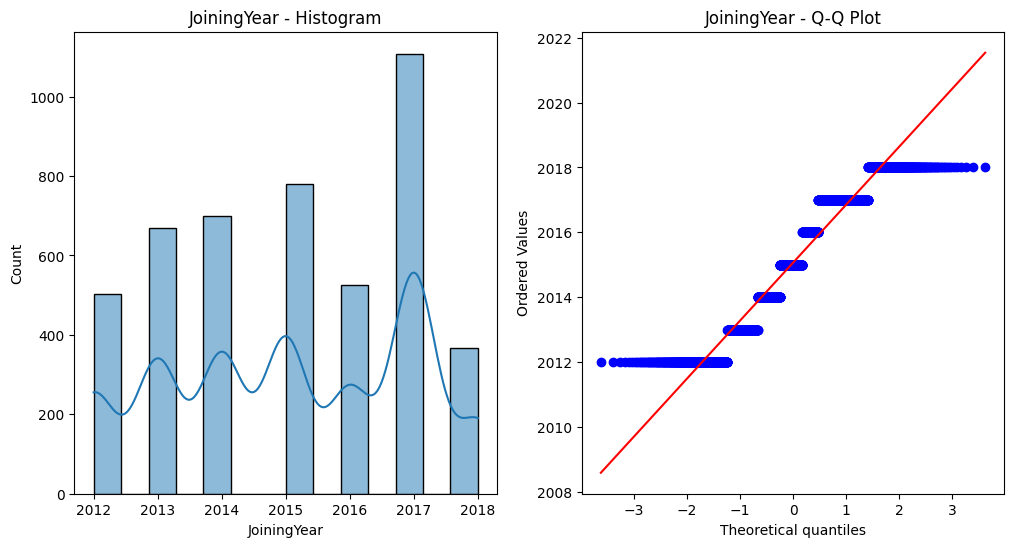

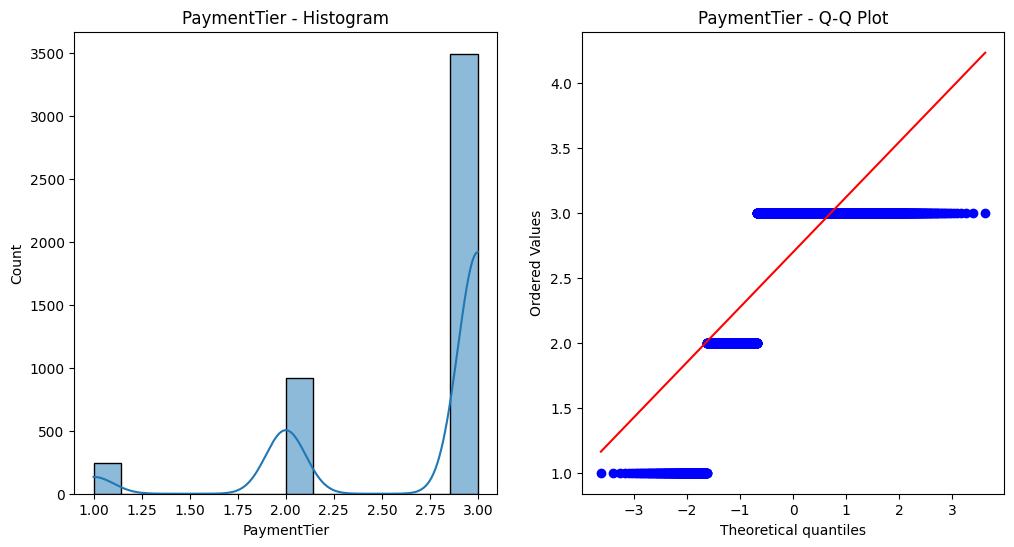

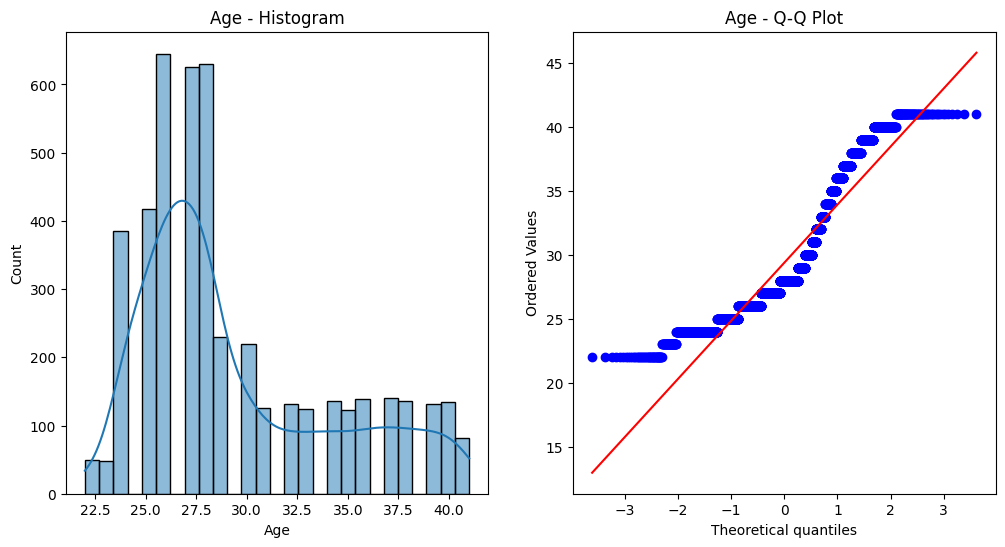

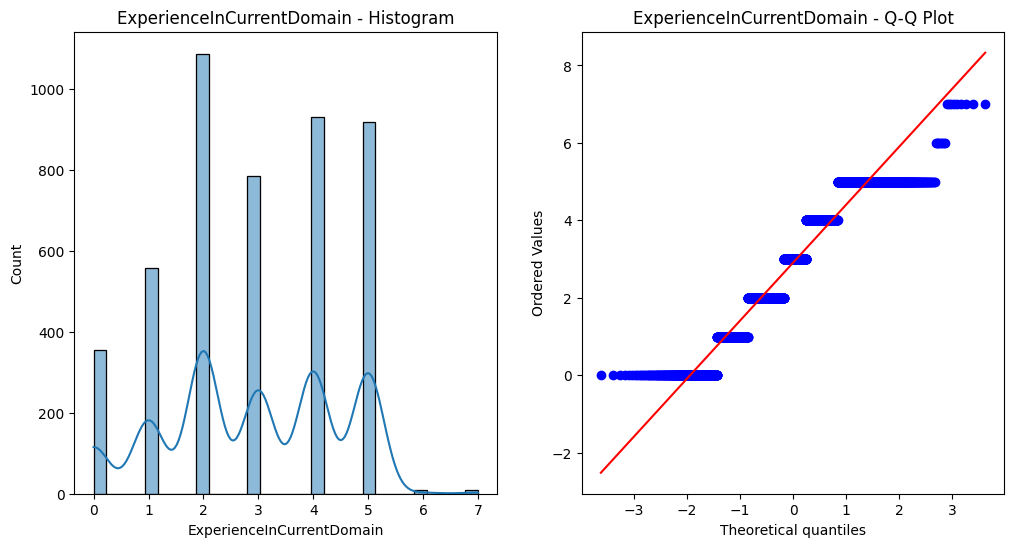

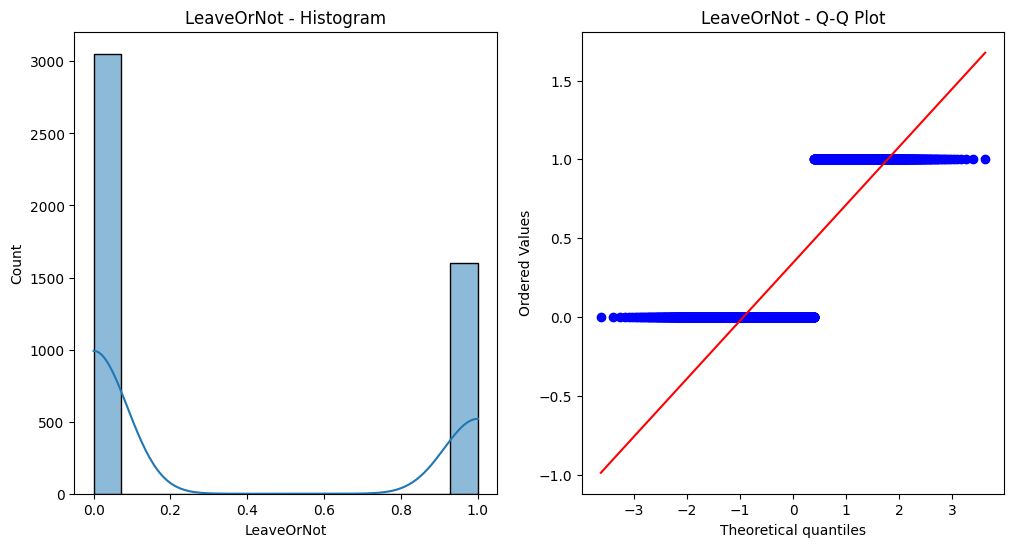

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} - Histogram')

    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'{column} - Q-Q Plot')

    plt.show()


In [7]:
import numpy as np  # Import NumPy at the top of your script

# Apply transformations
data['Log_Age'] = np.log1p(data['Age'])  # Log transformation for the 'Age' column
data['Sqrt_ExperienceInCurrentDomain'] = np.sqrt(data['ExperienceInCurrentDomain'])  # Square root t

# Apply transformations
data['Log_Age'] = np.log1p(data['Age'])
data['Sqrt_ExperienceInCurrentDomain'] = np.sqrt(data['ExperienceInCurrentDomain'])

**II.Applying suitable feature coding techniques**

In [8]:
# II. Feature coding techniques
# Ordinal encoding for 'Education'
education_ordering = {'Bachelors': 1, 'Masters': 2, 'PHD': 3}
data['Education_encoded'] = data['Education'].map(education_ordering)

In [9]:
# One-hot encoding for 'City'
city_dummies = pd.get_dummies(data['City'], prefix='City', drop_first=False)
data = pd.concat([data, city_dummies], axis=1)

# Binary encoding for 'Gender' and 'EverBenched'
data['Gender_encoded'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['EverBenched_encoded'] = data['EverBenched'].map({'No': 0, 'Yes': 1})

In [10]:
print(data.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'Log_Age',
       'Sqrt_ExperienceInCurrentDomain', 'Education_encoded', 'City_Bangalore',
       'City_New Delhi', 'City_Pune', 'Gender_encoded', 'EverBenched_encoded'],
      dtype='object')


**III.Standardizing and scaling the features**

In [11]:
 # Including 'City_Bangalore' in the list of features to standardize
features_to_standardize = ['JoiningYear', 'PaymentTier', 'Log_Age', 'Sqrt_ExperienceInCurrentDomain',
                           'Education_encoded', 'City_Bangalore', 'City_New Delhi', 'City_Pune',
                           'Gender_encoded', 'EverBenched_encoded']

# Applying StandardScaler to the specified features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = data.copy()
df_standardized[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

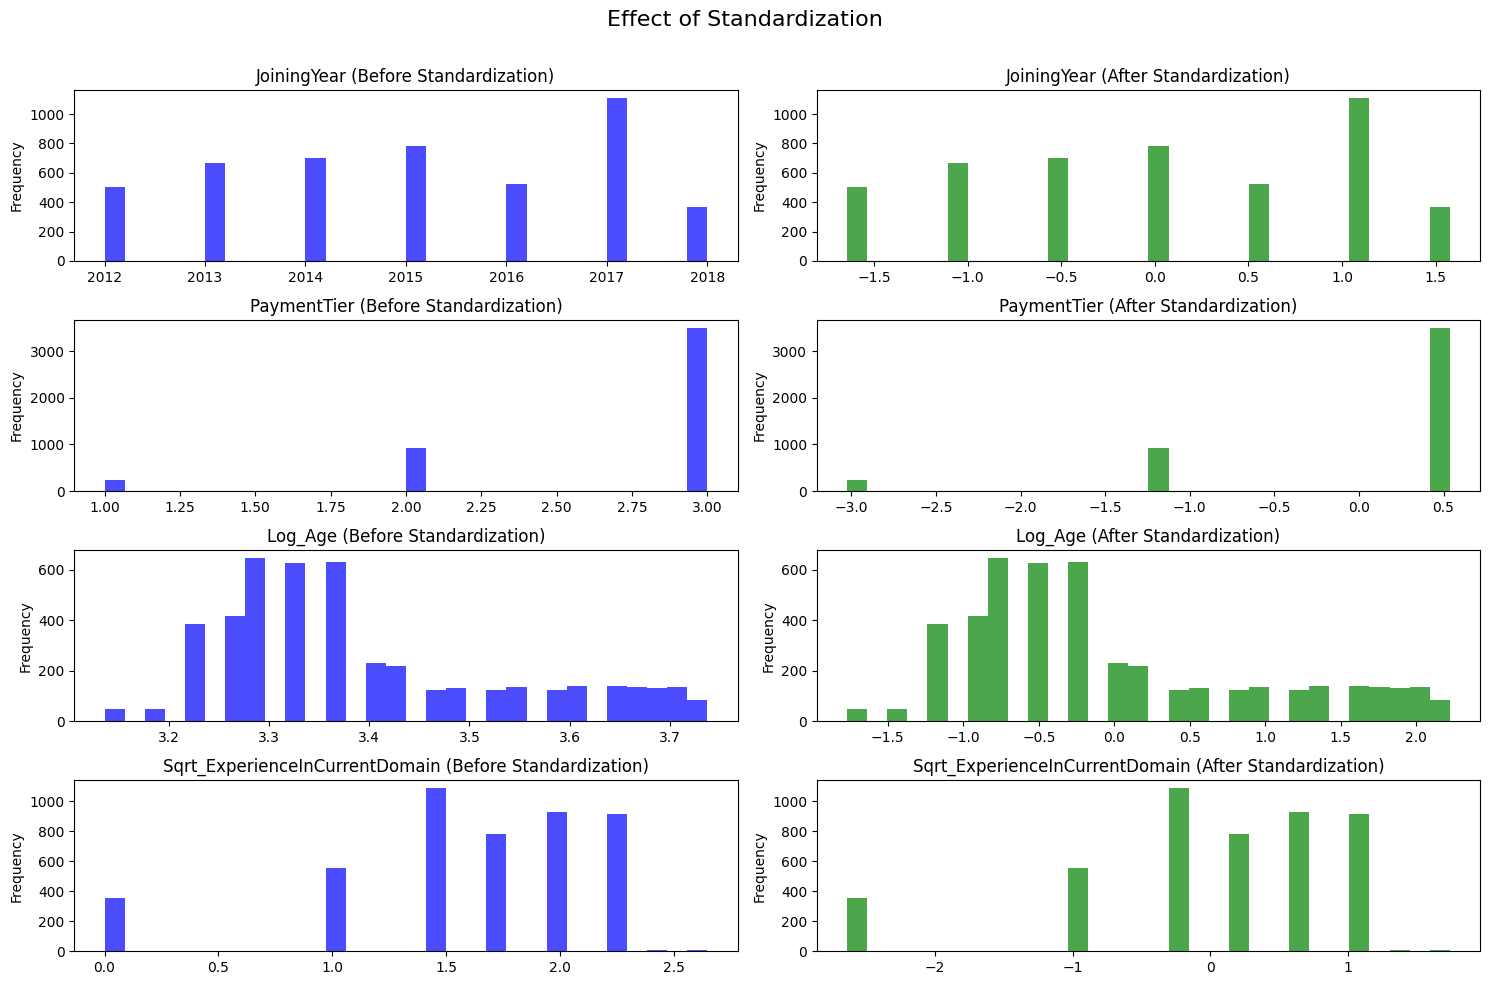

In [12]:
# Selected features for visualization
selected_features = ['JoiningYear', 'PaymentTier', 'Log_Age', 'Sqrt_ExperienceInCurrentDomain']

# Plot histograms before standardization
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(15, 10))
fig.suptitle('Effect of Standardization', fontsize=16)

for i, feature in enumerate(selected_features):
    # Before standardization
    axes[i, 0].hist(data[feature], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f"{feature} (Before Standardization)")
    axes[i, 0].set_ylabel("Frequency")

    # After standardization
    axes[i, 1].hist(df_standardized[feature], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f"{feature} (After Standardization)")
    axes[i, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [13]:
print(df_standardized.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'Log_Age',
       'Sqrt_ExperienceInCurrentDomain', 'Education_encoded', 'City_Bangalore',
       'City_New Delhi', 'City_Pune', 'Gender_encoded', 'EverBenched_encoded'],
      dtype='object')


**IV.Feature discretization**

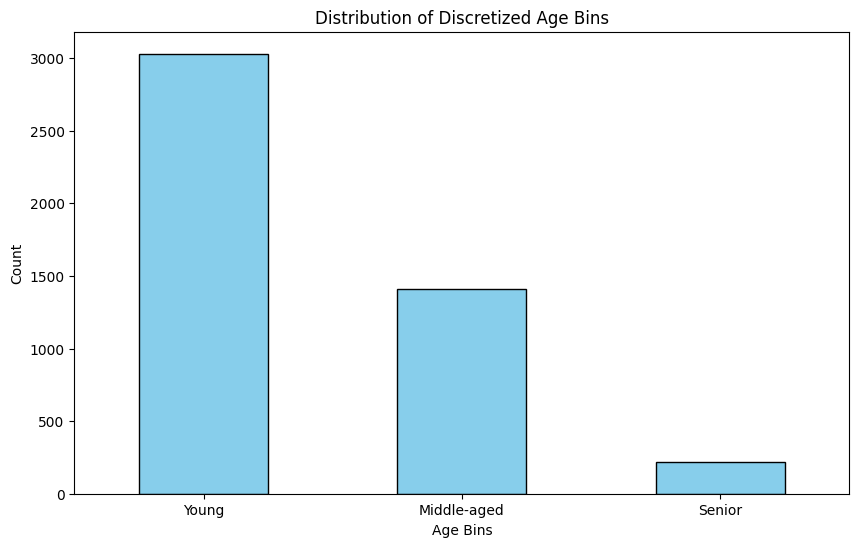

In [14]:
# IV. Feature discretization for 'Age'
bins = [20, 30, 40, 50]
labels = ['Young', 'Middle-aged', 'Senior']
df_standardized['Age_bins'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Visualize the distribution of the discretized 'Age' feature
age_bins_counts = df_standardized['Age_bins'].value_counts(sort=False)
plt.figure(figsize=(10, 6))
age_bins_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Discretized Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

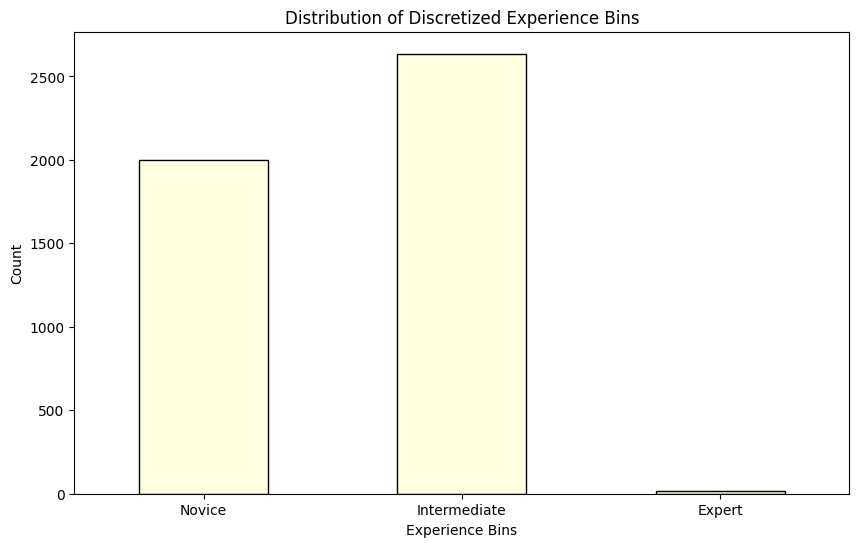

In [15]:
# Discretizing the 'ExperienceInCurrentDomain' feature
experience_bins = [-1, 2, 5, data['ExperienceInCurrentDomain'].max()]
experience_labels = ['Novice', 'Intermediate', 'Expert']
data['Experience_bins'] = pd.cut(data['ExperienceInCurrentDomain'], bins=experience_bins, labels=experience_labels, right=True)

# Visualize the distribution of the discretized 'ExperienceInCurrentDomain' feature
experience_bins_counts = data['Experience_bins'].value_counts(sort=False)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
experience_bins_counts.plot(kind='bar', color='lightyellow', edgecolor='black')
plt.title('Distribution of Discretized Experience Bins')
plt.xlabel('Experience Bins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

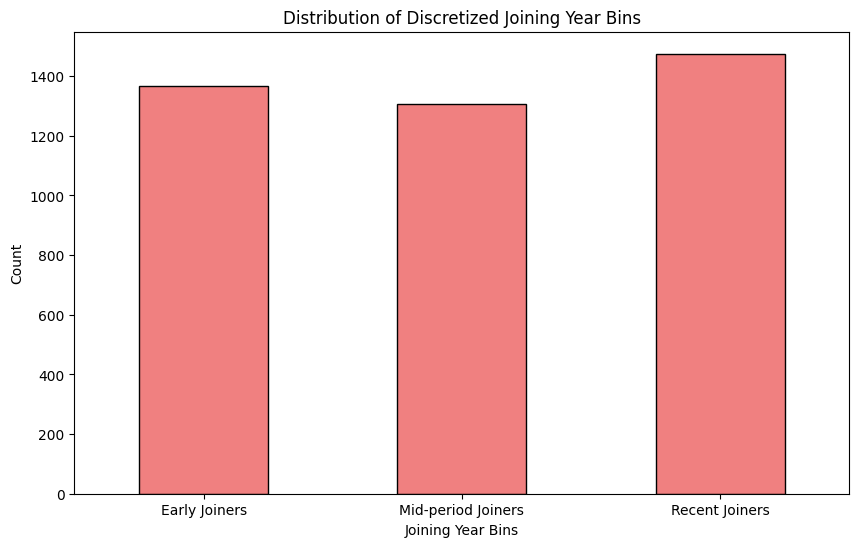

In [16]:
# Discretizing the 'JoiningYear' feature
min_year, max_year = data['JoiningYear'].min(), data['JoiningYear'].max()
joining_year_bins = [min_year, min_year + (max_year - min_year) / 3, min_year + 2 * (max_year - min_year) / 3, max_year]
joining_year_labels = ['Early Joiners', 'Mid-period Joiners', 'Recent Joiners']
data['JoiningYear_bins'] = pd.cut(data['JoiningYear'], bins=joining_year_bins, labels=joining_year_labels, right=True)

# Visualize the distribution of the discretized 'JoiningYear' feature
joining_year_bins_counts = data['JoiningYear_bins'].value_counts(sort=False)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
joining_year_bins_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Discretized Joining Year Bins')
plt.xlabel('Joining Year Bins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

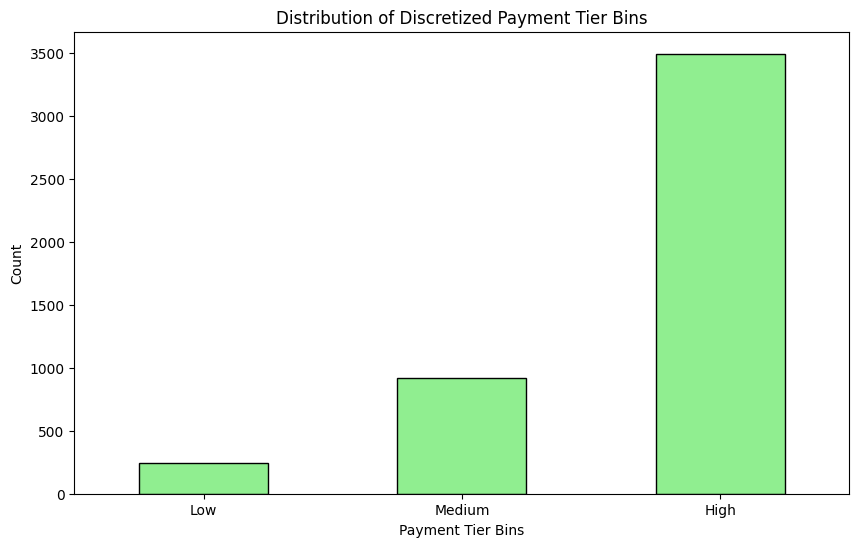

In [17]:
# Discretizing the 'PaymentTier' feature
payment_tier_bins = [0, 1.5, 2.5, data['PaymentTier'].max()]  # Assuming the tiers are 1, 2, and 3
payment_tier_labels = ['Low', 'Medium', 'High']
data['PaymentTier_bins'] = pd.cut(data['PaymentTier'], bins=payment_tier_bins, labels=payment_tier_labels, right=True, include_lowest=True)

# Visualize the distribution of the discretized 'PaymentTier' feature
payment_tier_bins_counts = data['PaymentTier_bins'].value_counts(sort=False)

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
payment_tier_bins_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Discretized Payment Tier Bins')
plt.xlabel('Payment Tier Bins')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# **2.Developing a MLP for binary classification**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
import torch
from sklearn.model_selection import train_test_split

# Define features and labels
X = df_standardized[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
                     'Education_encoded', 'City_Bangalore', 'City_New Delhi', 'City_Pune',
                     'Gender_encoded', 'EverBenched_encoded']]
Y = df_standardized['LeaveOrNot']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)

print("Tensors created successfully.")


Tensors created successfully.


In [21]:
print(X_train_tensor.shape, Y_train_tensor.shape)
print(X_test_tensor.shape, Y_test_tensor.shape)


torch.Size([3722, 10]) torch.Size([3722])
torch.Size([931, 10]) torch.Size([931])


In [22]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [23]:
# 2. Data Preparation
# Convert the data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
Y_train_tensor = torch.FloatTensor(Y_train.values).unsqueeze(1)  # Adding an extra dimension for BCELoss
X_test_tensor = torch.FloatTensor(X_test.values)
Y_test_tensor = torch.FloatTensor(Y_test.values).unsqueeze(1)

In [24]:
# 3. Model Definition
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

input_dim = X_train.shape[1]  # Number of input features
model = MLP(input_dim)

In [25]:
# 4. Training
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 10/100, Loss: 0.7774949669837952
Epoch 20/100, Loss: 0.644351065158844
Epoch 30/100, Loss: 0.6577150821685791
Epoch 40/100, Loss: 0.6299711465835571
Epoch 50/100, Loss: 0.6259084343910217
Epoch 60/100, Loss: 0.6191583275794983
Epoch 70/100, Loss: 0.6133313179016113
Epoch 80/100, Loss: 0.6072657704353333
Epoch 90/100, Loss: 0.6012008786201477
Epoch 100/100, Loss: 0.5949386358261108


In [26]:
# 5. Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    accuracy = (test_preds == Y_test_tensor).sum().item() / Y_test_tensor.size(0)
    print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.706766917293233


Accuracy: 0.706766917293233
Confusion Matrix:
 [[589  21]
 [252  69]]


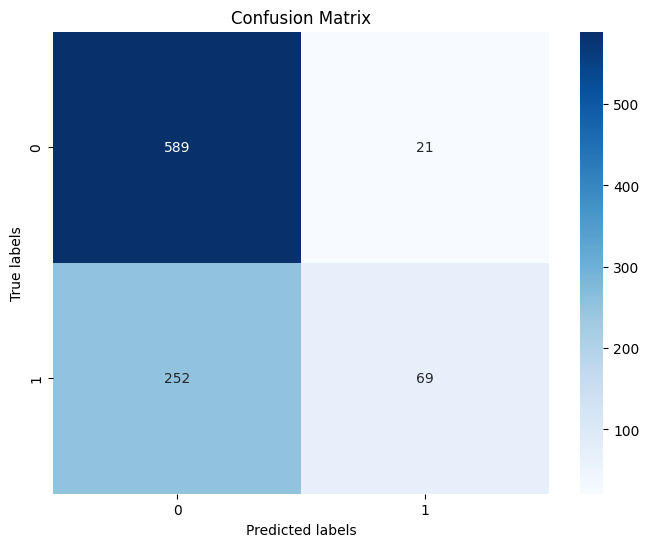

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Set the model to evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    # Convert outputs to binary predictions
    Y_pred_tensor = (test_outputs > 0.5).float()

# Convert tensors to numpy arrays for metrics calculation
Y_pred = Y_pred_tensor.numpy()
Y_true = Y_test_tensor.numpy()

# Calculate the accuracy
accuracy = accuracy_score(Y_true, Y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **3.Apply the following techniques to predict the value of Y**

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
def train_model(model, optimizer, criterion, X_train, Y_train, X_test, Y_test, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

    # Assess performance on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        Y_pred = (test_outputs > 0.5).float()
        accuracy = (Y_pred == Y_test).float().mean()
        print(f"Test Accuracy: {accuracy.item()}")

In [30]:
print(X_train_tensor.shape)  # This will reveal the actual number of features in your data


torch.Size([3722, 10])


**I. Different solvers**

In [39]:
import torch.nn.functional as F

class EnhancedMLP_Xavier(nn.Module):
    def __init__(self):
        super(EnhancedMLP_Xavier, self).__init__()
        self.fc1 = nn.Linear(10, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)

        # Xavier initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x.squeeze()

def train_model(model, optimizer, criterion, X_train, Y_train, X_test, Y_test, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs.view(-1, 1), Y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

    # Assess performance on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test).view(-1, 1)
        Y_pred = (test_outputs > 0.5).float()
        accuracy = (Y_pred == Y_test).float().mean()
        print(f"Test Accuracy: {accuracy.item()}")

# Train the model with Xavier initialization and assess accuracy
model_xavier = EnhancedMLP_Xavier().to(device)
optimizer = torch.optim.Adam(model_xavier.parameters(), lr=0.001)
train_model(model_xavier, optimizer, criterion, X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor)

Epoch 10/100, Loss: 0.6086719632148743
Epoch 20/100, Loss: 0.5862209796905518
Epoch 30/100, Loss: 0.564534604549408
Epoch 40/100, Loss: 0.5444477796554565
Epoch 50/100, Loss: 0.5386530160903931
Epoch 60/100, Loss: 0.5280706286430359
Epoch 70/100, Loss: 0.5214111804962158
Epoch 80/100, Loss: 0.5102633237838745
Epoch 90/100, Loss: 0.49891406297683716
Epoch 100/100, Loss: 0.49539440870285034
Test Accuracy: 0.8238453269004822


In [40]:
class EnhancedMLP_Xavier(nn.Module):
    def __init__(self):
        super(EnhancedMLP_Xavier, self).__init__()
        self.fc1 = nn.Linear(10, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)

        # HE initialization
        nn.init.kaiming_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight)
        nn.init.kaiming_uniform_(self.fc3.weight)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x.squeeze()

# Train the model with Xavier initialization and assess accuracy
model_xavier = EnhancedMLP_Xavier().to(device)
optimizer = torch.optim.Adam(model_xavier.parameters(), lr=0.001)
train_model(model_xavier, optimizer, criterion, X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor)

Epoch 10/100, Loss: 0.6555914282798767
Epoch 20/100, Loss: 0.6086446046829224
Epoch 30/100, Loss: 0.590411901473999
Epoch 40/100, Loss: 0.5802309513092041
Epoch 50/100, Loss: 0.5690763592720032
Epoch 60/100, Loss: 0.5585110783576965
Epoch 70/100, Loss: 0.5504223704338074
Epoch 80/100, Loss: 0.5478198528289795
Epoch 90/100, Loss: 0.5360993146896362
Epoch 100/100, Loss: 0.5389623045921326
Test Accuracy: 0.7776584029197693


In [41]:
class EnhancedMLP_Xavier(nn.Module):
    def __init__(self):
        super(EnhancedMLP_Xavier, self).__init__()
        self.fc1 = nn.Linear(10, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)

        # Uniform random initialization
        nn.init.uniform_(self.fc1.weight, -0.1, 0.1)
        nn.init.uniform_(self.fc2.weight, -0.1, 0.1)
        nn.init.uniform_(self.fc3.weight, -0.1, 0.1)


    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x.squeeze()

# Train the model with Xavier initialization and assess accuracy
model_xavier = EnhancedMLP_Xavier().to(device)
optimizer = torch.optim.Adam(model_xavier.parameters(), lr=0.001)
train_model(model_xavier, optimizer, criterion, X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor)

Epoch 10/100, Loss: 0.6221524477005005
Epoch 20/100, Loss: 0.574405312538147
Epoch 30/100, Loss: 0.5512810945510864
Epoch 40/100, Loss: 0.5360674262046814
Epoch 50/100, Loss: 0.5169818997383118
Epoch 60/100, Loss: 0.5076833963394165
Epoch 70/100, Loss: 0.4972516894340515
Epoch 80/100, Loss: 0.48503249883651733
Epoch 90/100, Loss: 0.4748006761074066
Epoch 100/100, Loss: 0.4704562723636627
Test Accuracy: 0.8195488452911377


**II. Different Activation functions**

In [43]:
class EnhancedMLP_Uniform(nn.Module):
    def __init__(self, activation_function='relu'):
        super(EnhancedMLP_Uniform, self).__init__()
        self.fc1 = nn.Linear(10, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(0.5)
        self.activation_function = activation_function

        # Uniform random initialization
        nn.init.uniform_(self.fc1.weight, -0.1, 0.1)
        nn.init.uniform_(self.fc2.weight, -0.1, 0.1)
        nn.init.uniform_(self.fc3.weight, -0.1, 0.1)

    def forward(self, x):
        if self.activation_function == 'relu':
            activation = F.relu
        elif self.activation_function == 'tanh':
            activation = torch.tanh
        elif self.activation_function == 'logistic':
            activation = torch.sigmoid
        elif self.activation_function == 'identity':
            activation = lambda x: x

        x = activation(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = activation(self.bn2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x))
        return x.squeeze()

activation_functions = ['identity', 'logistic', 'tanh', 'relu']

for act_func in activation_functions:
    print(f"Training with {act_func} activation function:")
    model_uniform = EnhancedMLP_Uniform(activation_function=act_func).to(device)
    optimizer = torch.optim.Adam(model_uniform.parameters(), lr=0.001)
    train_model(model_uniform, optimizer, criterion, X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor)
    print("="*50)

Training with identity activation function:
Epoch 10/100, Loss: 0.6243413686752319
Epoch 20/100, Loss: 0.6132410168647766
Epoch 30/100, Loss: 0.6064185500144958
Epoch 40/100, Loss: 0.5991579294204712
Epoch 50/100, Loss: 0.5969833731651306
Epoch 60/100, Loss: 0.593348503112793
Epoch 70/100, Loss: 0.5903269648551941
Epoch 80/100, Loss: 0.5857976078987122
Epoch 90/100, Loss: 0.5827935934066772
Epoch 100/100, Loss: 0.580053985118866
Test Accuracy: 0.7379162311553955
Training with logistic activation function:
Epoch 10/100, Loss: 0.6279972195625305
Epoch 20/100, Loss: 0.6087521314620972
Epoch 30/100, Loss: 0.5935536026954651
Epoch 40/100, Loss: 0.5849174857139587
Epoch 50/100, Loss: 0.5837235450744629
Epoch 60/100, Loss: 0.5779677033424377
Epoch 70/100, Loss: 0.5774733424186707
Epoch 80/100, Loss: 0.5786035656929016
Epoch 90/100, Loss: 0.5757541656494141
Epoch 100/100, Loss: 0.5760980844497681
Test Accuracy: 0.7368420958518982
Training with tanh activation function:
Epoch 10/100, Loss: 0.62

**III. Trial-error based hyper-parameter training**



In [45]:
# Define possible hyperparameters
learning_rates = [0.1, 0.01, 0.001]
hidden_sizes = [(128, 64), (64, 32), (256, 128)]
dropout_rates = [0.5, 0.4, 0.3]
weight_decays = [0.01, 0.001, 0.0001]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for hidden_size in hidden_sizes:
        for dropout_rate in dropout_rates:
            for weight_decay in weight_decays:

                class EnhancedMLP_Hyperparam(nn.Module):
                    def __init__(self, hidden_size, dropout_rate):
                        super(EnhancedMLP_Hyperparam, self).__init__()
                        self.fc1 = nn.Linear(10, hidden_size[0])
                        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
                        self.fc3 = nn.Linear(hidden_size[1], 1)
                        self.bn1 = nn.BatchNorm1d(hidden_size[0])
                        self.bn2 = nn.BatchNorm1d(hidden_size[1])
                        self.dropout = nn.Dropout(dropout_rate)

                        nn.init.uniform_(self.fc1.weight, -0.1, 0.1)
                        nn.init.uniform_(self.fc2.weight, -0.1, 0.1)
                        nn.init.uniform_(self.fc3.weight, -0.1, 0.1)

                    def forward(self, x):
                        x = F.relu(self.bn1(self.fc1(x)))
                        x = self.dropout(x)
                        x = F.relu(self.bn2(self.fc2(x)))
                        x = torch.sigmoid(self.fc3(x))
                        return x.squeeze()

                model_hyperparam = EnhancedMLP_Hyperparam(hidden_size, dropout_rate).to(device)
                optimizer = torch.optim.Adam(model_hyperparam.parameters(), lr=lr, weight_decay=weight_decay)

                # Here, you can use the train_model function or any other training loop you've defined previously
                train_model(model_hyperparam, optimizer, criterion, X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor)

                # Evaluate the model
                predictions = model_hyperparam(X_test_tensor).detach().cpu().numpy()
                predictions = [1 if pred > 0.5 else 0 for pred in predictions]
                accuracy = accuracy_score(Y_test_tensor.cpu().numpy(), predictions)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'learning_rate': lr, 'hidden_size': hidden_size, 'dropout_rate': dropout_rate, 'weight_decay': weight_decay}

print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")


Epoch 10/100, Loss: 0.6123283505439758
Epoch 20/100, Loss: 0.5335423946380615
Epoch 30/100, Loss: 0.49352988600730896
Epoch 40/100, Loss: 0.4839617609977722
Epoch 50/100, Loss: 0.4832511246204376
Epoch 60/100, Loss: 0.48598116636276245
Epoch 70/100, Loss: 0.4766026437282562
Epoch 80/100, Loss: 0.4770374298095703
Epoch 90/100, Loss: 0.4759734869003296
Epoch 100/100, Loss: 0.47371891140937805
Test Accuracy: 0.7303974032402039
Epoch 10/100, Loss: 0.5907212495803833
Epoch 20/100, Loss: 0.5517067313194275
Epoch 30/100, Loss: 0.48426052927970886
Epoch 40/100, Loss: 0.4442295730113983
Epoch 50/100, Loss: 0.4200746715068817
Epoch 60/100, Loss: 0.4203088581562042
Epoch 70/100, Loss: 0.4277978241443634
Epoch 80/100, Loss: 0.4211249351501465
Epoch 90/100, Loss: 0.4235188364982605
Epoch 100/100, Loss: 0.41947418451309204
Test Accuracy: 0.795918345451355
Epoch 10/100, Loss: 0.5626720786094666
Epoch 20/100, Loss: 0.5216613411903381
Epoch 30/100, Loss: 0.48910245299339294
Epoch 40/100, Loss: 0.448936

In [54]:
print(f"Best accuracy: {best_accuracy}")
print(f"Best parameters: {best_params}")

Best accuracy: 0.8796992481203008
Best parameters: {'learning_rate': 0.01, 'hidden_size': (128, 64), 'dropout_rate': 0.5, 'weight_decay': 0.0001}


### 4.Evaluate **the** performance